In [1]:
import os
import tensorflow as tf
from tensorflow.keras import Sequential , callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Process
- Model was slightly overfitting so added early stopping epcoh using 5
- Removed a 256 neuron layer from neural network to reduce complexity.
- Using original images for testing and augmented images for training.
- Further created a validation set validating model on unseen data it 80:20 ratio between original and validation images.
- trainng for more epochs 15 to see the effect of early stopping.
- Train accuracy is 0.9921  and test and validation is 0.96

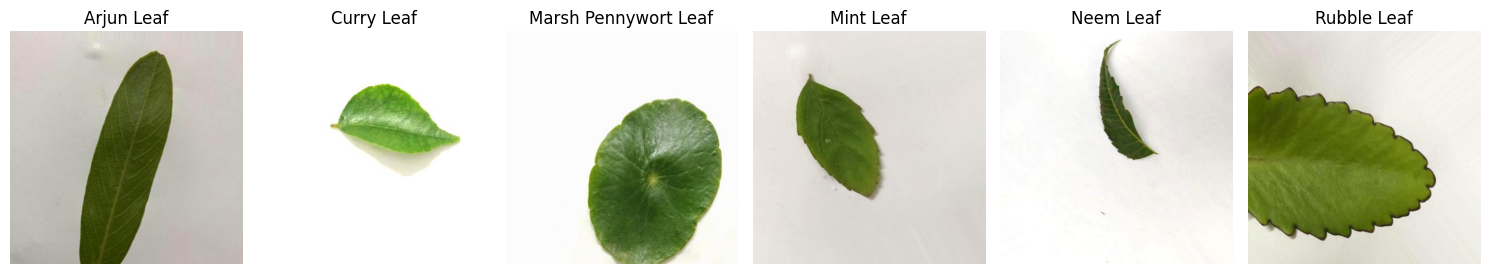

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import random
train_dir = r"../Medicinal Plant Identification Dataset/Augmented Images (Version 02)"
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
plt.figure(figsize=(15, 8))
for i, cls in enumerate(classes):
    cls_path = os.path.join(train_dir, cls)
    images = glob.glob(os.path.join(cls_path, '*.jpg'))  # Get path following the specified pattern
    if images:
        img_path = random.choice(images)
        img = mpimg.imread(img_path)
        plt.subplot(1, len(classes), i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
plt.tight_layout()
plt.show()

In [2]:
import tensorflow as tf

train_dir = r"../Medicinal Plant Identification Dataset/Augmented Images (Version 02)"
test_dir = r"../Medicinal Plant Identification Dataset/Original Images (Version 02)"
val_dir = r"../Medicinal Plant Identification Dataset/Validation Images"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        test_dir,
        labels="inferred",
        label_mode="categorical",
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE,
        shuffle=False
    )


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=False
)


Found 9660 files belonging to 6 classes.
Found 1380 files belonging to 6 classes.
Found 276 files belonging to 6 classes.


In [3]:
print(train_ds.class_names)

['Arjun Leaf', 'Curry Leaf', 'Marsh Pennywort Leaf', 'Mint Leaf', 'Neem Leaf', 'Rubble Leaf']


In [5]:
# Preprocess the dataset for better performance

def preprocess_images(image ,label):
    image = tf.cast(image/255 ,tf.float32) 
    return image ,label

preprocessed_train_ds = train_ds.map(preprocess_images)
preprocessed_test_ds = test_ds.map(preprocess_images)
preprocessed_val_ds = val_ds.map(preprocess_images)

In [6]:
# Create the CNN Model

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2) , strides= 2 , padding = 'valid'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2) , strides= 2 , padding = 'valid'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2) , strides= 2 , padding = 'valid'))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

model.summary()

C:\Users\windows\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,177,606 (42.64 MB)

 Trainable params: 11,177,606 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# callbacks
early_stoppping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=3 , restore_best_weights=True)

In [9]:
history = model.fit(preprocessed_train_ds, validation_data=preprocessed_test_ds, epochs=15 , callbacks=[early_stoppping_callback])

Epoch 1/15
302/302 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.4964 - loss: 1.2202 - val_accuracy: 0.8768 - val_loss: 0.4124
Epoch 2/15
302/302 ━━━━━━━━━━━━━━━━━━━━ 285s 941ms/step - accuracy: 0.9024 - loss: 0.2745 - val_accuracy: 0.9377 - val_loss: 0.2249
Epoch 3/15
302/302 ━━━━━━━━━━━━━━━━━━━━ 278s 921ms/step - accuracy: 0.9430 - loss: 0.1619 - val_accuracy: 0.9493 - val_loss: 0.1604
Epoch 4/15
302/302 ━━━━━━━━━━━━━━━━━━━━ 283s 935ms/step - accuracy: 0.9589 - loss: 0.1176 - val_accuracy: 0.9493 - val_loss: 0.1616
Epoch 5/15
302/302 ━━━━━━━━━━━━━━━━━━━━ 302s 1s/step - accuracy: 0.9639 - loss: 0.1078 - val_accuracy: 0.9457 - val_loss: 0.2196
Epoch 6/15
302/302 ━━━━━━━━━━━━━━━━━━━━ 297s 983ms/step - accuracy: 0.9727 - loss: 0.0859 - val_accuracy: 0.9616 - val_loss: 0.1413
Epoch 7/15
302/302 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.9843 - loss: 0.0532 - val_accuracy: 0.9493 - val_loss: 0.1756
Epoch 8/15
302/302 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.9802 - loss: 0.062

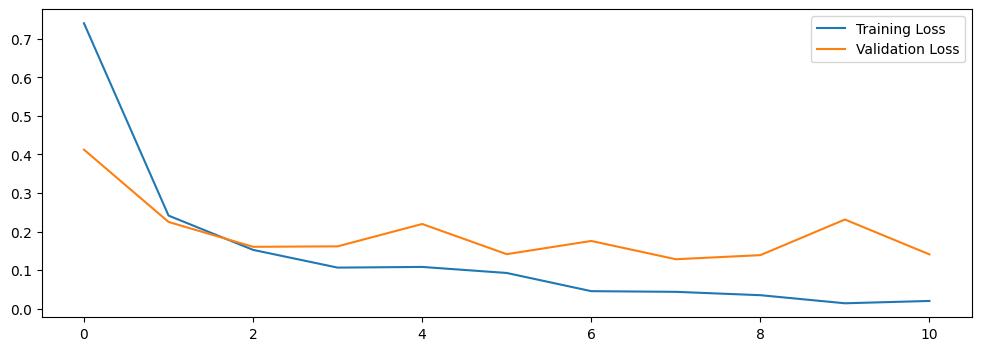

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

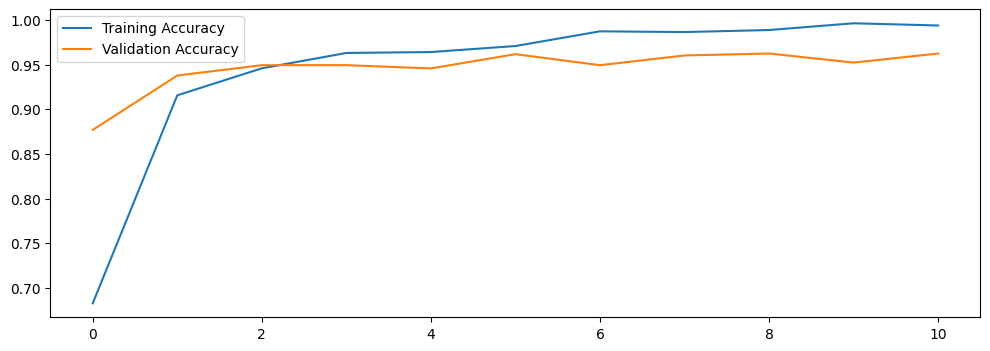

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [14]:
# validation
val_loss, val_accuracy = model.evaluate(preprocessed_val_ds)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.9714 - loss: 0.0936
Validation Loss: 0.0985
Validation Accuracy: 0.9674


In [ ]:
# Export the model and save it
model.save('../artifacts/models/best_model.h5')
model.save('../artifacts/models/best_model.keras')

model.save_weights('../artifacts/weights/best_model_weights.weights.h5')